In [1]:
import autograd.numpy as np
import matplotlib.pyplot as plt
from RegressionModel import RegressionModel
from NeuralNetwork import NeuralNetwork
from functions import *

seed = 42

In [2]:
n = 100
x = np.linspace(-3, 5, n).reshape(-1, 1)
coeffs = [2.0, 1.5, 0.5, 1.0]
y_true = f(x, coeffs)
y = y_true + np.random.normal(0.0, 15, (n, 1))

In [3]:
model = RegressionModel(x, y, 3, seed = seed)
X_train, X_test, y_train, y_test = model.X_train, model.X_test, model.y_train, model.y_test
network_input_size = X_train.shape[1]
print(network_input_size)
layer_output_sizes = [8, 8, 12, 4, 1]  # Two hidden layers with 8 nodes each, single output for regression

4


In [4]:
# one-hot in numpy
def to_categorical_numpy(integer_vector):
    n_inputs = len(integer_vector)
    n_categories = np.max(integer_vector) + 1
    onehot_vector = np.zeros((n_inputs, n_categories))
    onehot_vector[range(n_inputs), integer_vector] = 1
    
    return onehot_vector

#Y_train_onehot, Y_test_onehot = to_categorical(Y_train), to_categorical(Y_test)
y_train_onehot, y_test_onehot = to_categorical_numpy(y_train), to_categorical_numpy(y_test)

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [5]:
epochs = 100
batch_size = 100

dnn = NeuralNetwork(X_train, y_train)
dnn.train()
test_predict = dnn.predict(X_test)

# equivalent in numpy
def accuracy_score_numpy(y_test, y_pred):
    return np.sum(y_test == y_pred) / len(y_test)

# accuracy score from scikit library
print("Accuracy score on test set: ", accuracy_score_numpy(y_test, test_predict))

Accuracy score on test set:  0.0


In [134]:
network = NeuralNetwork(network_input_size, layer_output_sizes, [sigmoid, sigmoid, sigmoid, sigmoid, linear], [sigmoid_der, sigmoid_der, sigmoid_der, sigmoid_der, linear_der], cost_func = MSE, cost_der = MSE_der)

In [135]:
layer_grads = network.compute_gradients(X_train, y_train)

In [136]:
network.update_weights_sgd(X_train, y_train, 0.001, 0.09, 100, 5)

In [137]:
y_pred = network.predict(X_train)

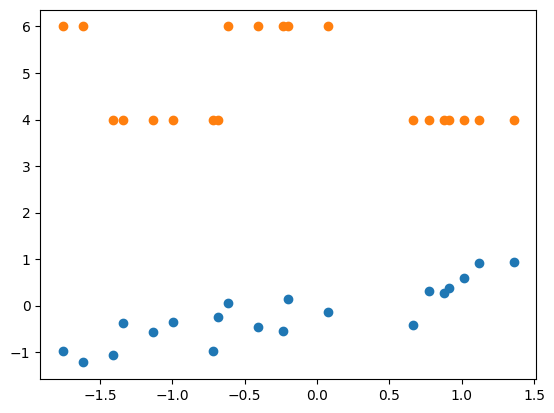

In [6]:
plt.scatter(X_test[:, 1], y_test)
plt.scatter(X_test[:, 1], test_predict)